In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [3]:
df=pd.read_csv('medical_appointments.csv')

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
#null values
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [8]:
df.dtypes

,0
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,int64
Neighbourhood,object
Scholarship,int64
Hipertension,int64
Diabetes,int64


In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
#Convert date columns (ScheduledDay, AppointmentDay) to datetime


df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [11]:
df.dtypes

,0
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,"datetime64[ns, UTC]"
AppointmentDay,"datetime64[ns, UTC]"
Age,int64
Neighbourhood,object
Scholarship,int64
Hipertension,int64
Diabetes,int64


In [12]:
#Create a new column: DaysBetween = AppointmentDay - ScheduledDay

df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


In [13]:
# print all values of days between

print(df['DaysBetween'].unique())

[ -1   1   2   0   3   8  28   9  22  10  17  16  13  27  23  20  14  15
  21  42  29  30  41  31  55  44  45  38  36  37  43  49  59  51  52  64
  66  90  65  83  77  86 114 108  62  69  71  56  57  50  58  40  48  72
  63  19  32  33   5  34  35  11  12  39  46   7   4   6  24  25  47  26
  18  60  54  61 175  53  76  68  82  75  88  80 102  78  67  74  84 111
  -2  79  85  97  93 141 154 161 168 103 132 124  95  87  89 150 125 126
 110 118  73  70  81 107 109 101 121 100 104  91  96  92 106  94  -7 138
 131 178 116 145 122]


In [14]:
#duplicate values
df.duplicated().sum()

np.int64(0)

In [15]:
#Remove unrealistic values (e.g., age < 0, DaysBetween<0)

# remove unrealistic values for age
df = df[df['Age'] >= 0]

# remove unrealistic values for DaysBetween
df = df[df['DaysBetween'] >= 0]

# display basic statistics after removing unrealistic values
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysBetween
count,7.195900e+04,7.195900e+04,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000
mean,1.452606e+14,5.655042e+06,38.502564,0.092706,0.208897,0.074723,0.025320,0.020025,0.493086,14.642018
std,2.535667e+14,7.472189e+04,22.925421,0.290021,0.406523,0.262946,0.157096,0.154072,0.499956,16.494334
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.968099e+12,5.617796e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2.991891e+13,5.661165e+06,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,9.371660e+13,5.707178e+06,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000
max,9.999320e+14,5.784985e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


In [16]:
print('Days Between : \n',df['DaysBetween'].unique())
print('\nAge : \n',df['Age'].unique())

Days Between : 
 [  1   2   0   3   8  28   9  22  10  17  16  13  27  23  20  14  15  21
  42  29  30  41  31  55  44  45  38  36  37  43  49  59  51  52  64  66
  90  65  83  77  86 114 108  62  69  71  56  57  50  58  40  48  72  63
  19  32  33   5  34  35  11  12  39  46   7   4   6  24  25  47  26  18
  60  54  61 175  53  76  68  82  75  88  80 102  78  67  74  84 111  79
  85  97  93 141 154 161 168 103 132 124  95  87  89 150 125 126 110 118
  73  70  81 107 109 101 121 100 104  91  96  92 106  94 138 131 178 116
 145 122]

Age : 
 [ 76  23  39  19  30  29  22  28  54  15  50  40   4  13  46  12  38  85
  55  71  78  31  58  27   8   2   3   0  69  62  68  64  60  21  67  49
  10   1  11  35  51  20  26  34  56  59  18  33  16  36  42  47  17  41
   5  45  44  37  24  32   6  66  63  75  52  74  53  65  57  14   9  43
   7  70  72  48  87  25  83  77  61  88  89  79  73  80  84  82  94  86
  91  98  81  92  90  96  93  95  97 115 100 102]


In [17]:
# remove outliers for age (e.g., age > 100)
df = df[df['Age'] <= 100]

# display basic statistics after removing age outliers
df.describe()
print('\nAge after removing outliers : \n',df['Age'].unique())


Age after removing outliers : 
 [ 76  23  39  19  30  29  22  28  54  15  50  40   4  13  46  12  38  85
  55  71  78  31  58  27   8   2   3   0  69  62  68  64  60  21  67  49
  10   1  11  35  51  20  26  34  56  59  18  33  16  36  42  47  17  41
   5  45  44  37  24  32   6  66  63  75  52  74  53  65  57  14   9  43
   7  70  72  48  87  25  83  77  61  88  89  79  73  80  84  82  94  86
  91  98  81  92  90  96  93  95  97 100]


In [18]:
# Convert 'No-show' column to binary:
# 'No' → 0 (showed up)
# 'Yes' → 1 (missed appointment)

df['No-show'] = df['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

print(df['No-show'].value_counts())

df.head()

No-show
0    51435
1    20519
Name: count, dtype: int64


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0,1


In [19]:
# create colum of Weekday of appointment

df['AppointmentDayWeekday'] = df['AppointmentDay'].dt.day_name()

print(df['AppointmentDayWeekday'].value_counts())

df.head()

AppointmentDayWeekday
Wednesday    17044
Tuesday      16462
Monday       14580
Friday       12515
Thursday     11322
Saturday        31
Name: count, dtype: int64


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DaysBetween,AppointmentDayWeekday
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,1,Friday
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,1,Friday
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,1,Friday
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,1,Friday
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,0,1,Friday


# Exploratory Data Analysis

*Relation between Variable and No-show rate*

No-show rate by SMS_received:
   SMS_received   No-show
0             0  0.294327
1             1  0.275753


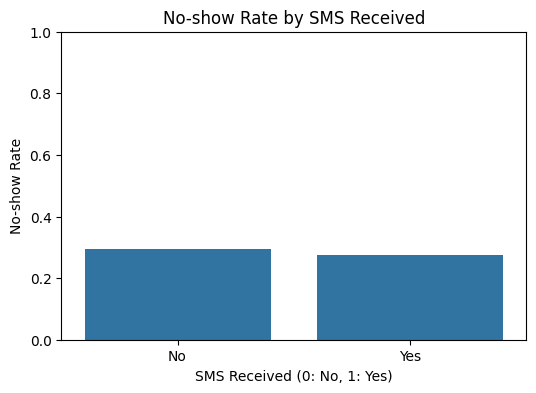

In [20]:
# No-show rate by SMS_received

# Group by 'SMS_received' and calculate the mean of 'No-show' (which is the no-show rate)
no_show_rate_by_sms = df.groupby('SMS_received')['No-show'].mean().reset_index()

print("No-show rate by SMS_received:")
print(no_show_rate_by_sms)

# Plot the no-show rate by SMS_received
plt.figure(figsize=(6, 4))
sns.barplot(x='SMS_received', y='No-show', data=no_show_rate_by_sms)
plt.title('No-show Rate by SMS Received')
plt.xlabel('SMS Received (0: No, 1: Yes)')
plt.ylabel('No-show Rate')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.ylim(0, 1) # Set y-axis limit between 0 and 1 for rate
plt.show()


No-show rate by Age Group:
  AgeGroup   No-show
0     0-17  0.322714
1    18-34  0.345194
2    35-54  0.281622
3    55-74  0.210526
4   75-100  0.218543


<ipython-input-21-ad4f23c10283>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_show_rate_by_age_group = df.groupby('AgeGroup')['No-show'].mean().reset_index()


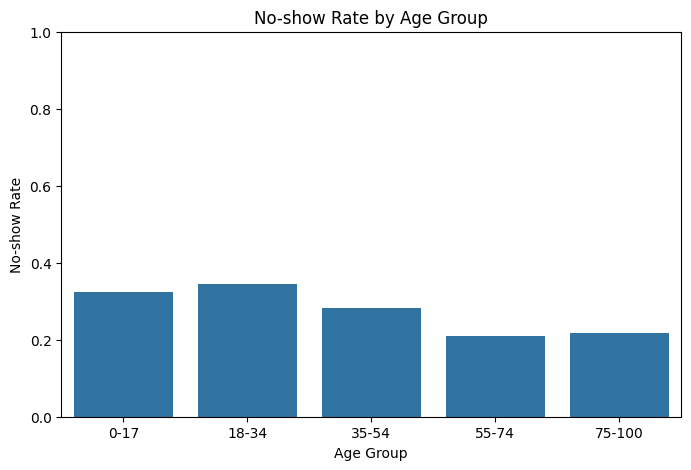

In [21]:
# Age group vs. no-show rate

# Group ages into bins
age_bins = [0, 18, 35, 55, 75, 100]
age_labels = ['0-17', '18-34', '35-54', '55-74', '75-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the no-show rate for each age group
no_show_rate_by_age_group = df.groupby('AgeGroup')['No-show'].mean().reset_index()

print("\nNo-show rate by Age Group:")
print(no_show_rate_by_age_group)

# Plot the no-show rate by age group
plt.figure(figsize=(8, 5))
sns.barplot(x='AgeGroup', y='No-show', data=no_show_rate_by_age_group, order=age_labels)
plt.title('No-show Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No-show Rate')
plt.ylim(0, 1) # Set y-axis limit between 0 and 1 for rate
plt.show()

*Weekday trends*


No-show rate by Weekday:
  AppointmentDayWeekday   No-show
0                Monday  0.302058
1               Tuesday  0.286660
2             Wednesday  0.271474
3              Thursday  0.272567
4                Friday  0.293568
5              Saturday  0.290323
6                Sunday       NaN


<ipython-input-22-33b5d4e540f4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AppointmentDayWeekday', y='No-show', data=no_show_rate_by_weekday, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


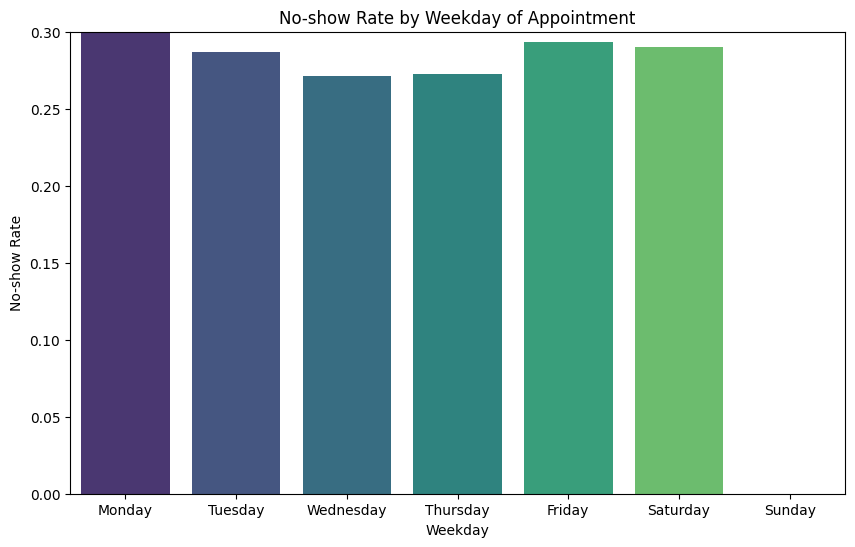

In [22]:
# No-show rate by Weekday of appointment

# Calculate the no-show rate for each weekday
no_show_rate_by_weekday = df.groupby('AppointmentDayWeekday')['No-show'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

print("\nNo-show rate by Weekday:")
print(no_show_rate_by_weekday)

# Plot the no-show rate by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='AppointmentDayWeekday', y='No-show', data=no_show_rate_by_weekday, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('No-show Rate by Weekday of Appointment')
plt.xlabel('Weekday')
plt.ylabel('No-show Rate')
plt.ylim(0, 0.3) # Set y-axis limit for better visualization of the variation
plt.show()

*Impact of GapDays, Scholarship, etc.*


<ipython-input-23-2f1d109a195f>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_show_rate_by_days = df.groupby('DaysBetweenGroup')['No-show'].mean().reset_index()
<ipython-input-23-2f1d109a195f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DaysBetweenGroup', y='No-show', data=no_show_rate_by_days, order=days_labels, palette='plasma')



No-show rate by Days Between Appointment and Scheduling:
  DaysBetweenGroup   No-show
0                0  0.213505
1              1-7  0.250060
2             8-30  0.319993
3            31-90  0.331098
4              >90  0.273292


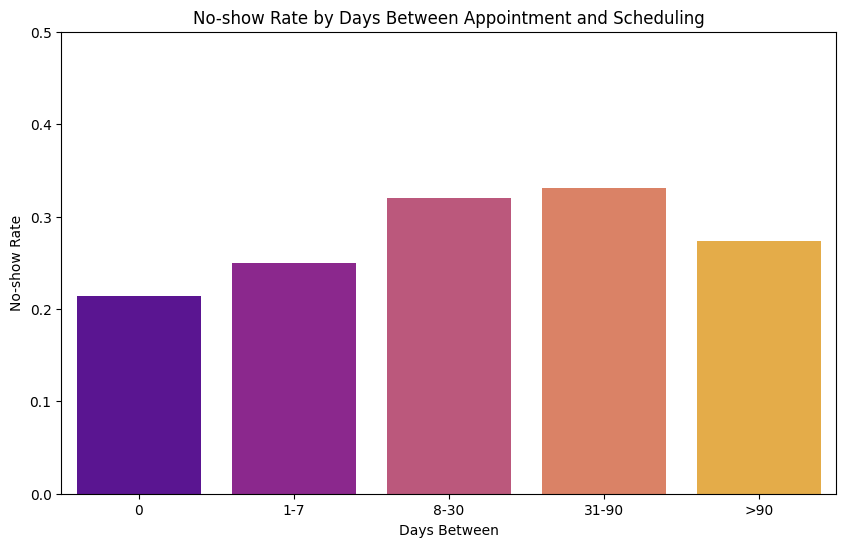

In [23]:
# Days between appointment and scheduling vs. no-show rate

# Create bins for DaysBetween
days_bins = [-1, 0, 7, 30, 90, df['DaysBetween'].max()]
days_labels = ['0', '1-7', '8-30', '31-90', '>90']
df['DaysBetweenGroup'] = pd.cut(df['DaysBetween'], bins=days_bins, labels=days_labels, right=True)

# Calculate the no-show rate for each DaysBetween group
no_show_rate_by_days = df.groupby('DaysBetweenGroup')['No-show'].mean().reset_index()

print("\nNo-show rate by Days Between Appointment and Scheduling:")
print(no_show_rate_by_days)

# Plot the no-show rate by DaysBetween group
plt.figure(figsize=(10, 6))
sns.barplot(x='DaysBetweenGroup', y='No-show', data=no_show_rate_by_days, order=days_labels, palette='plasma')
plt.title('No-show Rate by Days Between Appointment and Scheduling')
plt.xlabel('Days Between')
plt.ylabel('No-show Rate')
plt.ylim(0, 0.5) # Set y-axis limit for better visualization
plt.show()


No-show rate by Scholarship:
   Scholarship   No-show
0            0  0.278572
1            1  0.349723


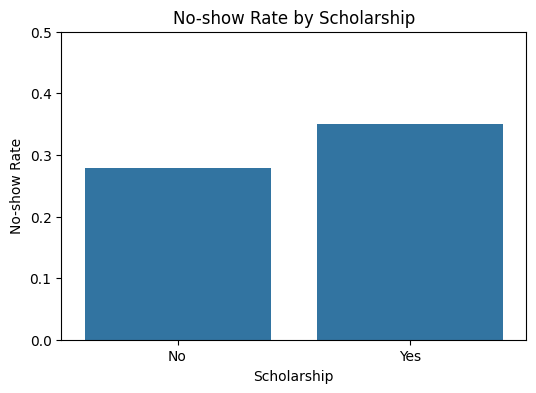


No-show rate by Hipertension:
   Hipertension   No-show
0             0  0.298350
1             1  0.235247


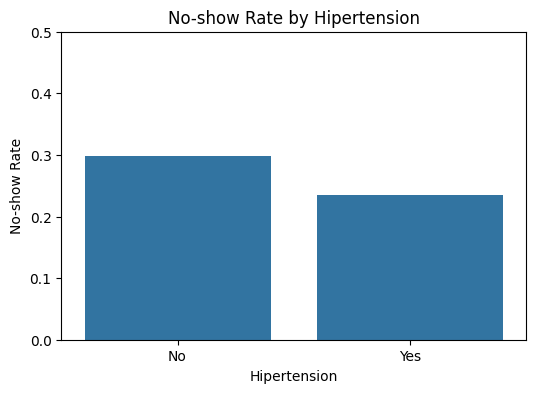


No-show rate by Diabetes:
   Diabetes   No-show
0         0  0.288042
1         1  0.249582


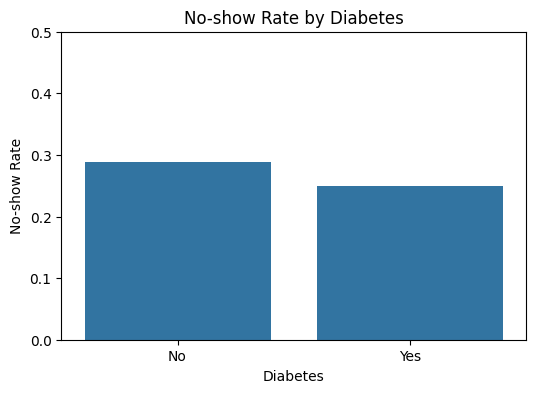


No-show rate by Alcoholism:
   Alcoholism   No-show
0           0  0.283722
1           1  0.340834


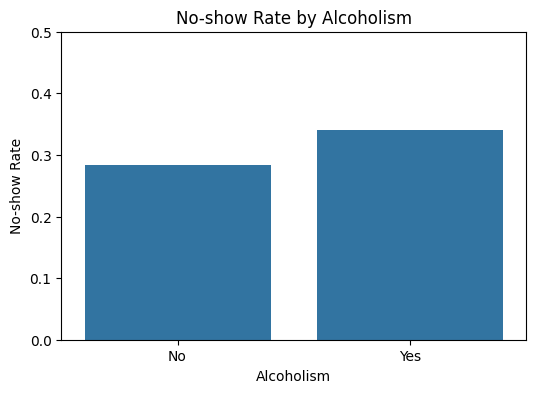

In [24]:
# Scholarship, Hypertention, Diabetes, Alcoholism vs. no-show rate

# List of medical conditions and scholarship
medical_cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism']

for col in medical_cols:
  # Calculate the no-show rate for each category (0 and 1)
  no_show_rate_by_condition = df.groupby(col)['No-show'].mean().reset_index()

  print(f"\nNo-show rate by {col}:")
  print(no_show_rate_by_condition)

  # Plot the no-show rate
  plt.figure(figsize=(6, 4))
  sns.barplot(x=col, y='No-show', data=no_show_rate_by_condition)
  plt.title(f'No-show Rate by {col}')
  plt.xlabel(col)
  plt.ylabel('No-show Rate')
  plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
  plt.ylim(0, 0.5) # Set y-axis limit
  plt.show()

# Model Training

*Import necessary libraries*

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

*Feature engineering*

In [26]:
features = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'SMS_received']
x = df[features]
y = df['No-show']

In [27]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

*RandomForest Classifier*

In [28]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Predictions
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7067611701758043
Confusion Matrix:
 [[40169  1023]
 [15857   515]]


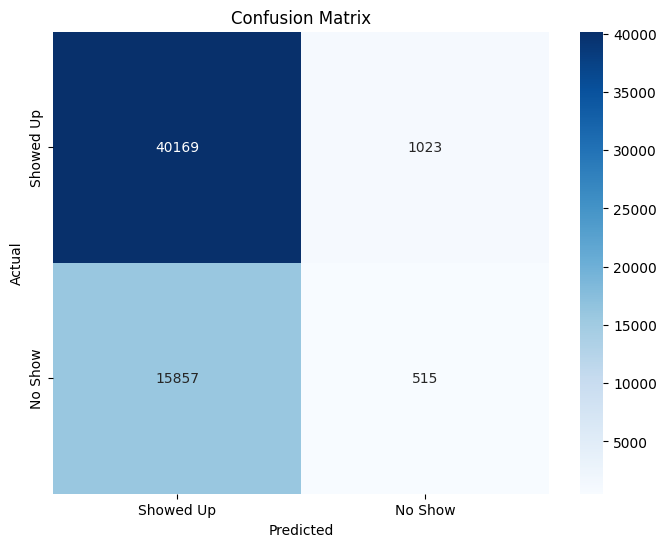

In [30]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Showed Up', 'No Show'], yticklabels=['Showed Up', 'No Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

*XG Boost*

In [32]:
!pip install xgboost

from xgboost import XGBClassifier

In [33]:
# Model training using XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:53:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [34]:
# Predictions using XGBoost
y_pred_xgb = xgb_model.predict(x_test)

In [35]:
# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7116600653186019
XGBoost Confusion Matrix:
 [[40741   451]
 [16147   225]]


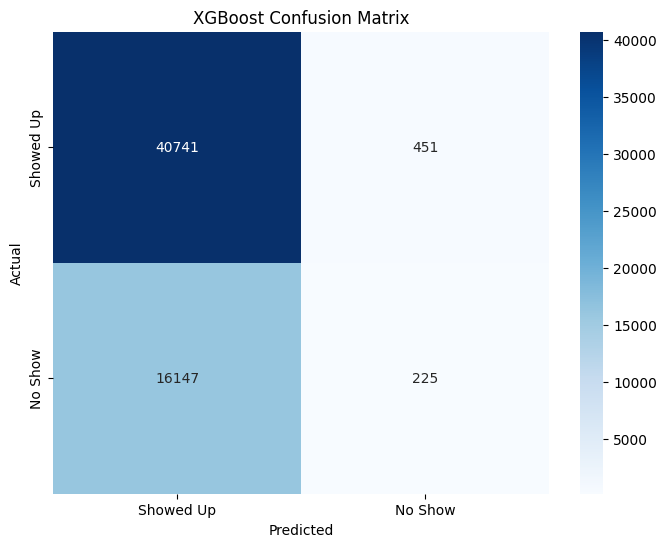

In [36]:
# Confusion matrix visualization for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Showed Up', 'No Show'], yticklabels=['Showed Up', 'No Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

*Decision Tree Classifier*

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
# Model training using Decision Tree Classifier
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
# Predictions using Decision Tree Classifier
y_pred_dtc = dtc_model.predict(x_test)

In [40]:
# Evaluation
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("Decision Tree Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtc))

Decision Tree Classifier Accuracy: 0.7085852268779098
Decision Tree Classifier Confusion Matrix:
 [[40357   835]
 [15940   432]]


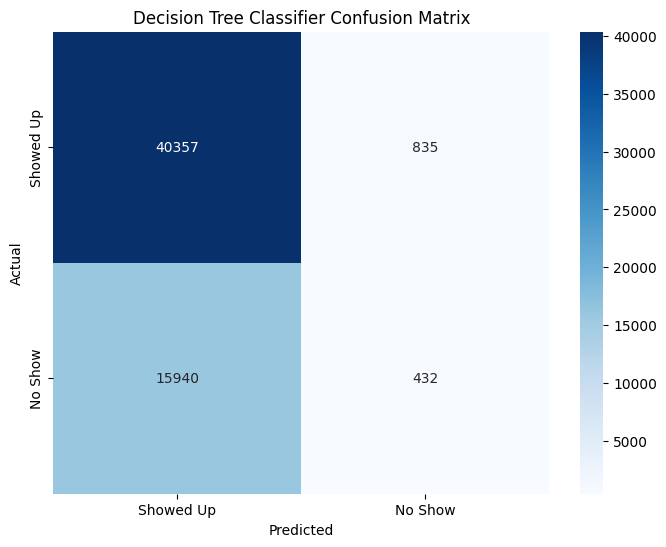

In [41]:
# Confusion matrix visualization for Decision Tree Classifier
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues', xticklabels=['Showed Up', 'No Show'], yticklabels=['Showed Up', 'No Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()

*Logistic Regression*

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
# Model training using Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [45]:
# Predictions using Logistic Regression
y_pred_lr = lr_model.predict(x_test)

In [46]:
# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7155861302202766
Logistic Regression Confusion Matrix:
 [[41192     0]
 [16372     0]]


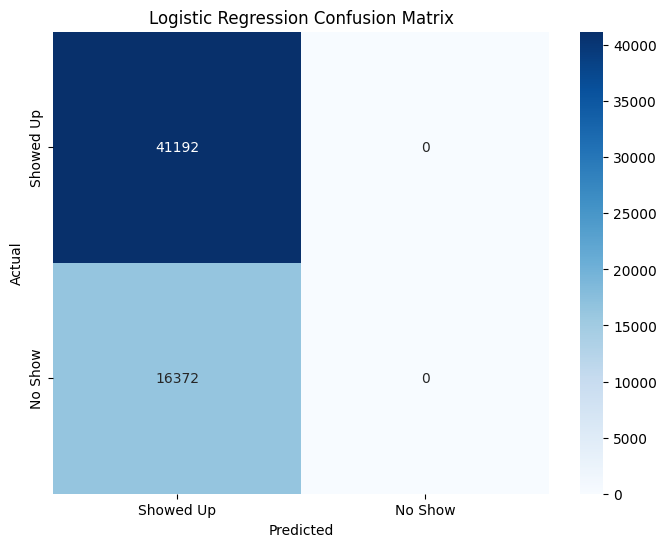

In [47]:
# Confusion matrix visualization for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Showed Up', 'No Show'], yticklabels=['Showed Up', 'No Show'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

f1 scores

In [49]:
# Calculate F1 scores
f1_rf = f1_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred_xgb)
f1_dtc = f1_score(y_test, y_pred_dtc)
f1_lr = f1_score(y_test, y_pred_lr)

# Print accuracies and F1 scores
print("\n--- Model Performance ---")
print(f"Random Forest Classifier: Accuracy = {accuracy_score(y_test, y_pred):.4f}, F1 Score = {f1_rf:.4f}")
print(f"XGBoost: Accuracy = {accuracy_score(y_test, y_pred_xgb):.4f}, F1 Score = {f1_xgb:.4f}")
print(f"Decision Tree Classifier: Accuracy = {accuracy_score(y_test, y_pred_dtc):.4f}, F1 Score = {f1_dtc:.4f}")
print(f"Logistic Regression: Accuracy = {accuracy_score(y_test, y_pred_lr):.4f}, F1 Score = {f1_lr:.4f}")


--- Model Performance ---
Random Forest Classifier: Accuracy = 0.7068, F1 Score = 0.0575
XGBoost: Accuracy = 0.7117, F1 Score = 0.0264
Decision Tree Classifier: Accuracy = 0.7086, F1 Score = 0.0490
Logistic Regression: Accuracy = 0.7156, F1 Score = 0.0000
